In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#https://www.kaggle.com/nidakapmaz/unidentified-flying-object

In [2]:
df = pd.read_csv("scrubbed.csv",low_memory=False)

In [3]:
df.head(2)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082


In [4]:
# comments column contains unmeaningfull words. 
# cleaning character caused unmeaningful words
# Different encoding types were tried. Result negative


In [5]:
df.comments = df.comments.str.replace("&#44","").str.replace("&amp","")

In [6]:
df.comments

0        This event took place in early fall around 194...
1        1949 Lackland AFB TX.  Lights racing across th...
2          Green/Orange circular disc over Chester England
3        My older brother and twin sister were leaving ...
4        AS a Marine 1st Lt. flying an FJ4B fighter/att...
                               ...                        
80327    Round from the distance/slowly changing colors...
80328    Boise ID spherical 20 min 10 red lights seen b...
80329                                             Napa UFO
80330    Saw a five gold lit cicular craft moving fastl...
80331    2 witnesses 2  miles apart Red ; White Elongat...
Name: comments, Length: 80332, dtype: object

In [7]:
df.shape

(80332, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [9]:
df.isnull().sum()
# number of Null 

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [10]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    missing_percent = round(missing_percent,2)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [11]:
(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100

country                 12.037544
state                    7.216302
shape                    2.405019
comments                 0.018673
datetime                 0.000000
city                     0.000000
duration (seconds)       0.000000
duration (hours/min)     0.000000
date posted              0.000000
latitude                 0.000000
longitude                0.000000
dtype: float64

In [12]:
missing(df)

,Missing_Number,Missing_Percent
country,9670,12.04
state,5797,7.22
shape,1932,2.41
comments,15,0.02
datetime,0,0.00
city,0,0.00
duration (seconds),0,0.00
duration (hours/min),0,0.00
date posted,0,0.00
latitude,0,0.00


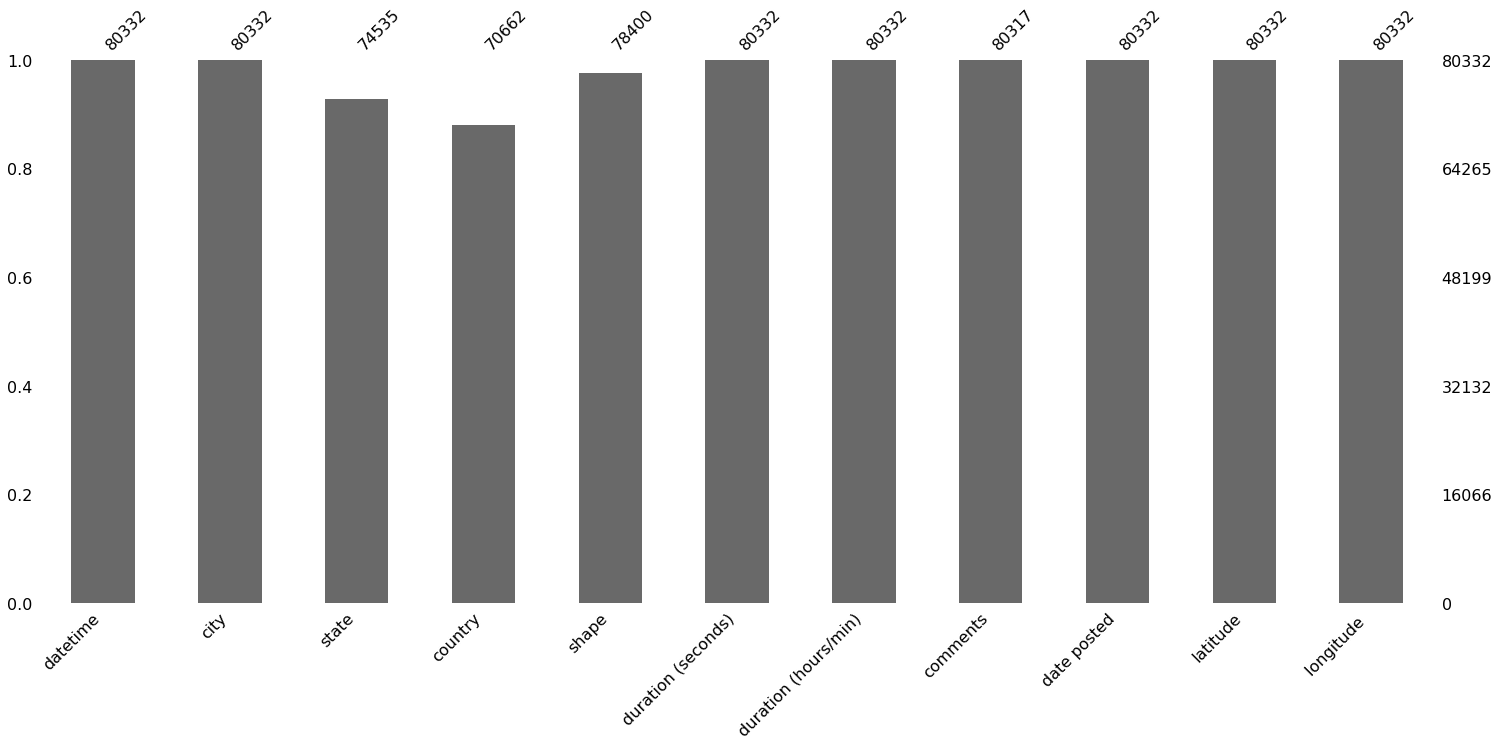

In [13]:
msno.bar(df);

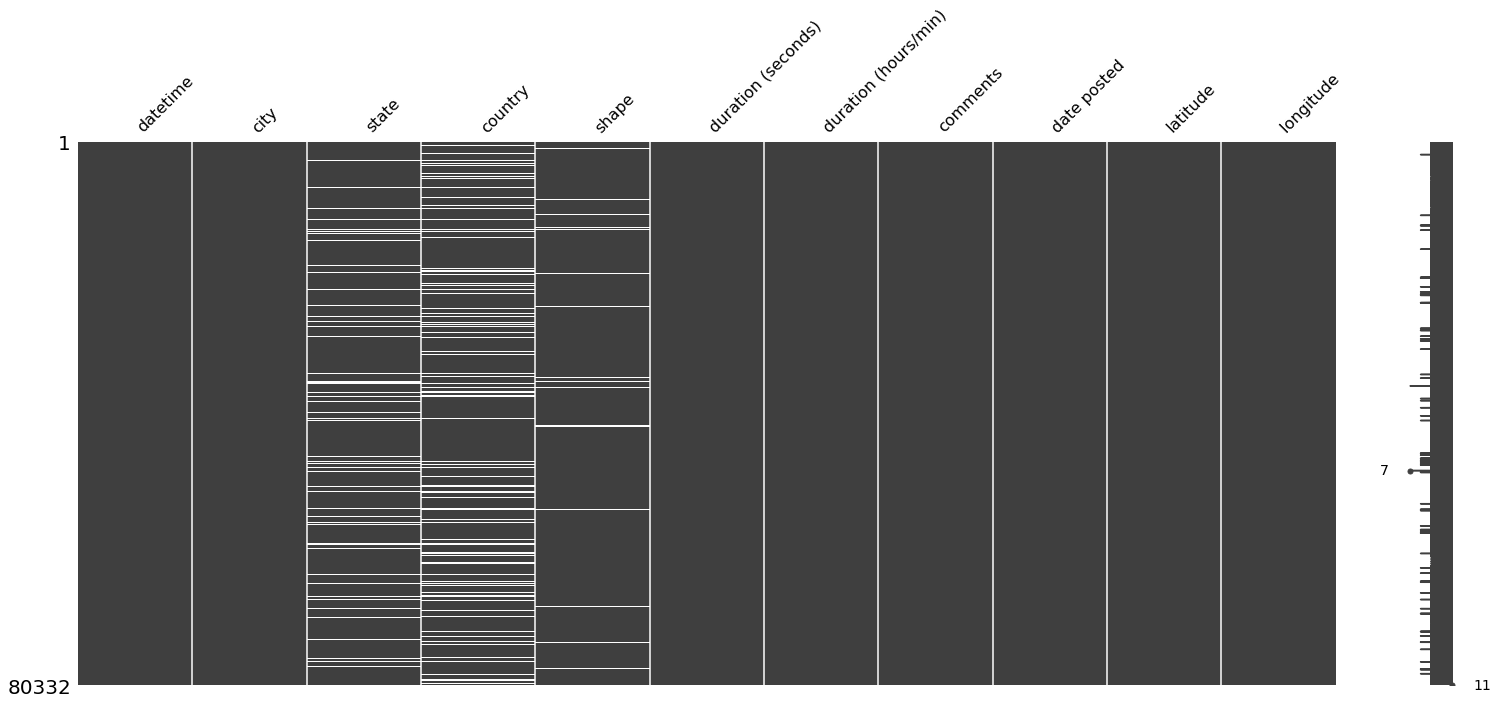

In [14]:
msno.matrix(df);

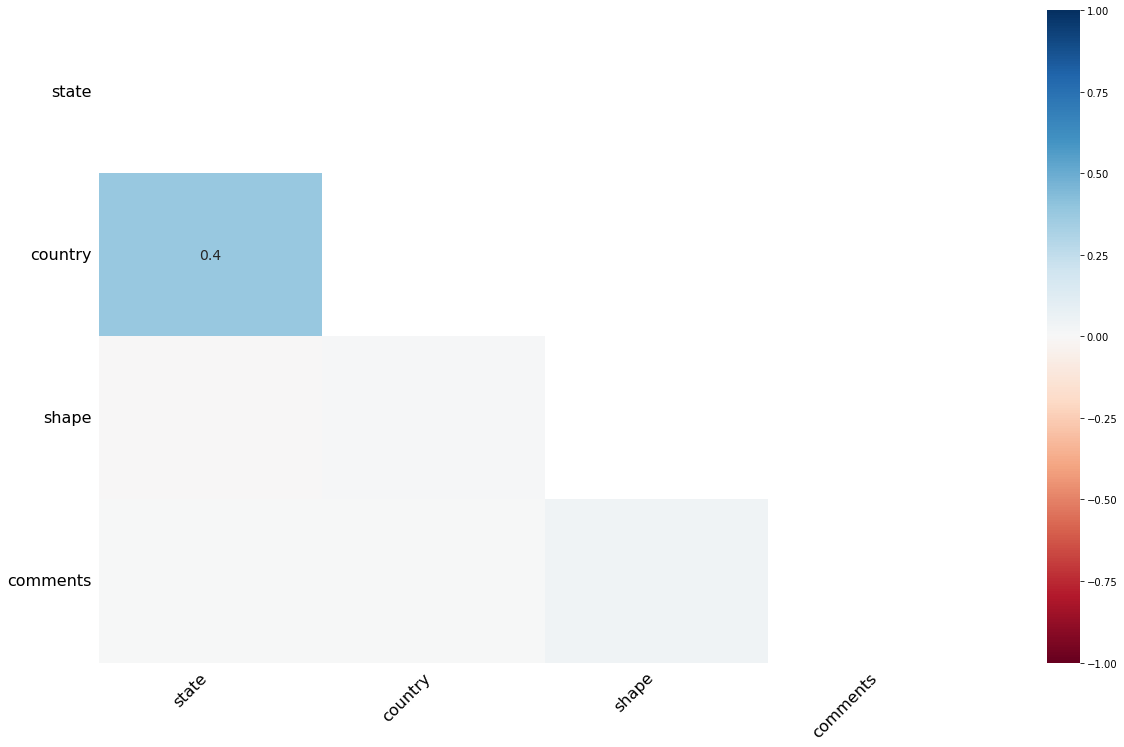

In [15]:
msno.heatmap(df);

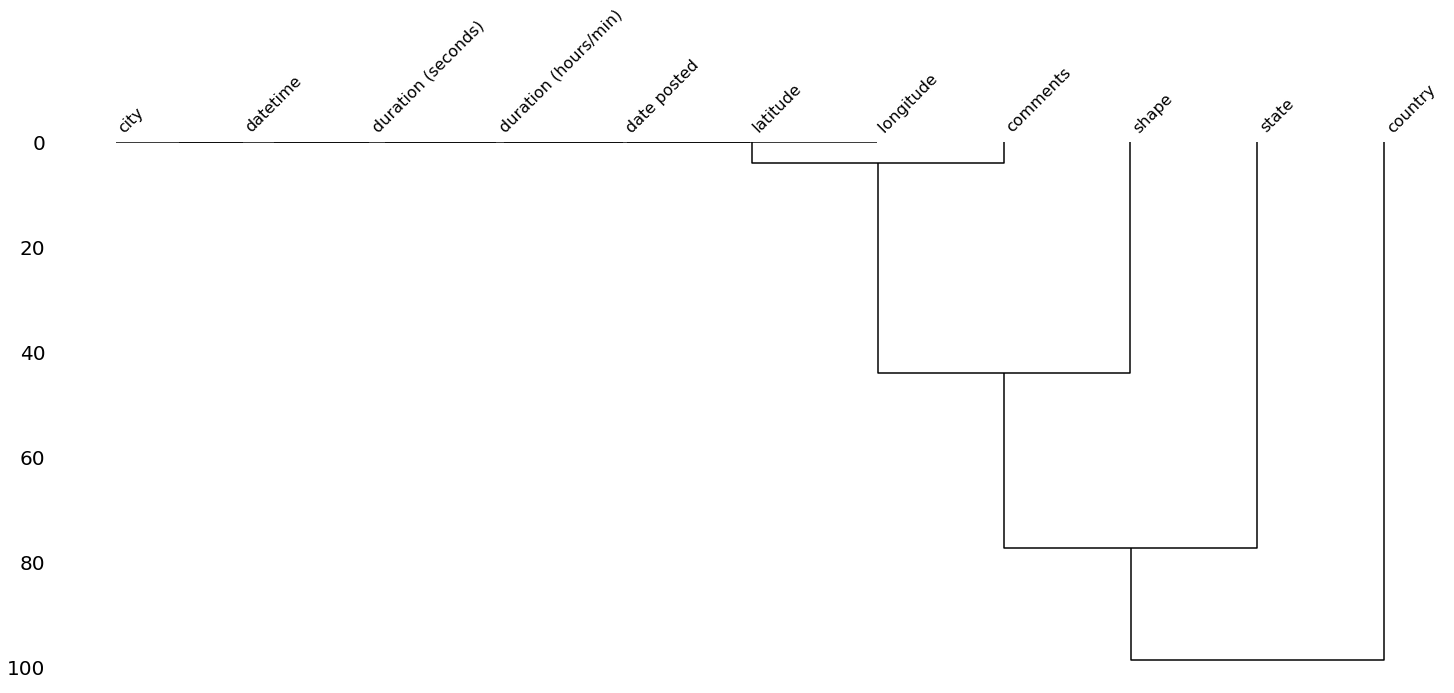

In [16]:
msno.dendrogram(df);

In [17]:
df.drop_duplicates(inplace=True)
print(df.shape)

(80331, 11)


In [18]:
# let's checkthe data column by columns

In [19]:
df.shape

(80331, 11)

In [20]:
column_list = df.columns.to_list()
column_list

['datetime',
 'city',
 'state',
 'country',
 'shape',
 'duration (seconds)',
 'duration (hours/min)',
 'comments',
 'date posted',
 'latitude',
 'longitude ']

# datetime

In [21]:
df[['datetime']]

,datetime
0,10/10/1949 20:30
1,10/10/1949 21:00
2,10/10/1955 17:00
3,10/10/1956 21:00
4,10/10/1960 20:00
...,...
80327,9/9/2013 21:15
80328,9/9/2013 22:00
80329,9/9/2013 22:00
80330,9/9/2013 22:20


In [22]:
df.datetime.sample(5)

14995     11/5/2009 05:00
7150      10/8/2011 21:10
17778    12/12/2011 01:00
76931     9/22/2005 21:00
4920     10/27/2009 22:45
Name: datetime, dtype: object

In [23]:
# df.datetime = pd.to_datetime(df.datetime)
# the code written above give error because of time format.
# time format can not be 24:00 so time need to be edited

In [24]:
df.datetime = df.datetime.map(lambda x: "00:00" if "24:00" in x else x )
# time format replaced from 24:00 to 00:00

In [25]:
df.datetime = pd.to_datetime(df.datetime)

In [26]:
df.datetime.dtype

dtype('<M8[ns]')

In [27]:
# split date and time

In [28]:
df.datetime.dt.year.value_counts()
# UFO sightings by year 


2012    7308
2013    6991
2011    5077
2008    4777
2009    4508
        ... 
1920       1
1906       1
1933       1
1925       1
1934       1
Name: datetime, Length: 88, dtype: int64

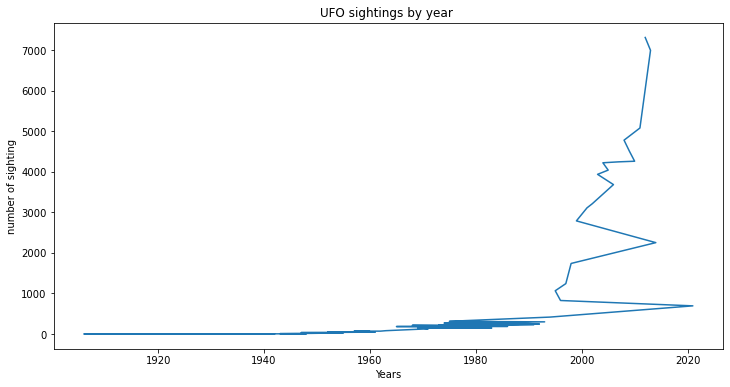

In [29]:
plt.figure(figsize=(12,6))
plt.title("UFO sightings by year ")
plt.xlabel("Years")
plt.ylabel("number of sighting")
df.datetime.dt.year.value_counts().plot(kind = "line");




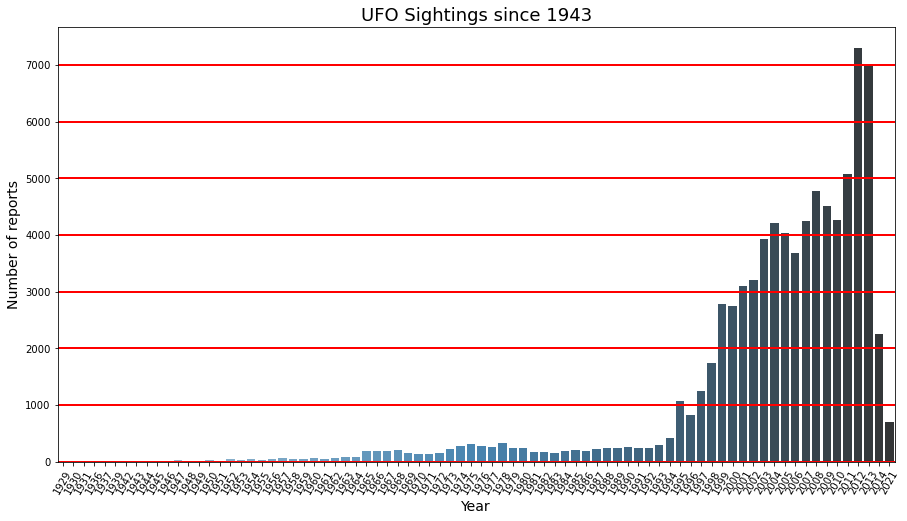

In [30]:

years_data = df.datetime.dt.year.value_counts()
years_index = years_data.index  
years_values = years_data.values
plt.figure(figsize=(15,8))
plt.grid(color='r', linestyle='-', linewidth=2)
plt.xticks(rotation = 60)
plt.title('UFO Sightings since 1943', fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of reports", fontsize=14)
years_plot = sns.barplot(x=years_index[:80],y=years_values[:80], palette = "Blues_d")



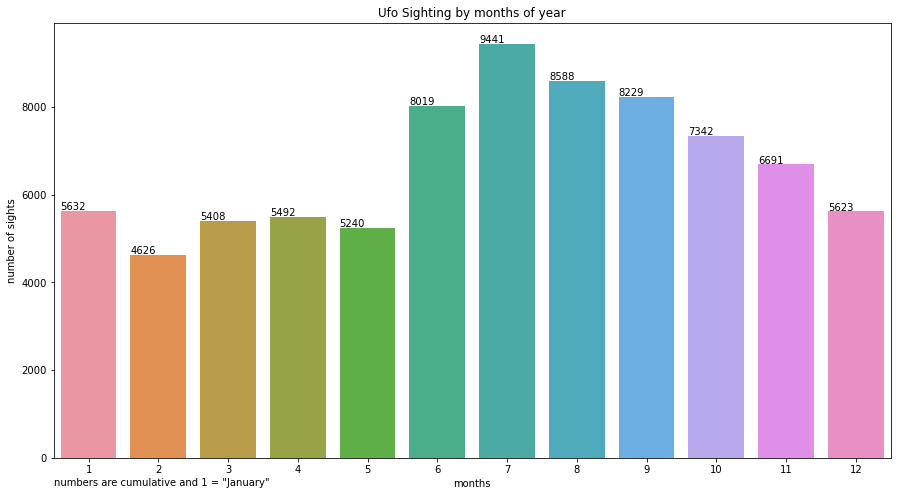

In [31]:
plt.figure(figsize=(15,8))
plt.title("Ufo Sighting by months of year")
ax = sns.countplot(df.datetime.dt.month)
ax.set(xlabel='months', ylabel='number of sights')

plt.annotate('numbers are cumulative and 1 = "January"', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')

for p in ax.patches:
    ax.annotate( str(p.get_height()),  (p.get_x(), p.get_height()+20));

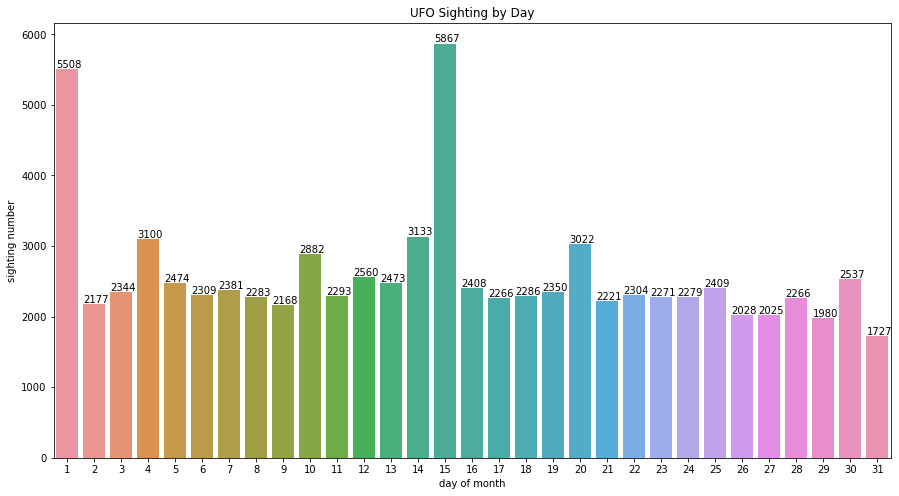

In [32]:
plt.figure(figsize=(15,8))

ax = sns.countplot(df.datetime.dt.day)
plt.title("UFO Sighting by Day")
ax.set(xlabel = "day of month", ylabel = "sighting number")
for p in ax.patches:
    ax.annotate( str(p.get_height()),  (p.get_x(), p.get_height()+20));


# country & city

In [33]:
df[["country","city"]]

,country,city
0,us,san marcos
1,NaN,lackland afb
2,gb,chester (uk/england)
3,us,edna
4,us,kaneohe
...,...,...
80327,us,nashville
80328,us,boise
80329,us,napa
80330,us,vienna


In [34]:
print("Country: ",df.country.unique())
print("city: ", df.city.unique())

Country:  ['us' nan 'gb' 'ca' 'au' 'de']
city:  ['san marcos' 'lackland afb' 'chester (uk/england)' ... 'calmar (canada)'
 'aleksandrow (poland)' 'hamstead (hollyridge)']


In [35]:
df.country.value_counts(dropna=False)

us     65114
NaN     9670
ca      2999
gb      1905
au       538
de       105
Name: country, dtype: int64

In [36]:
# None values in country column
df[df.country.isnull()].head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB TX. Lights racing across th...,12/16/2005,29.38421,-98.581082
18,1973-10-10 23:00:00,bermuda nas,NaN,NaN,light,20,20 sec.,saw fast moving blip on the radar scope thin w...,1/11/2002,32.364167,-64.678611
29,1979-10-10 22:00:00,saddle lake (canada),ab,NaN,triangle,270,4.5 or more min.,Lights far above that glance; then flee from ...,1/19/2005,53.970571,-111.689885
35,1982-10-10 07:00:00,gisborne (new zealand),NaN,NaN,disk,120,2min,gisborne nz 1982 wainui beach to sponge bay,1/11/2002,-38.662334,178.017649
40,1986-10-10 20:00:00,holmes/pawling,ny,NaN,chevron,180,3 minutes,Football Field Sized Chevron with bright white...,10/8/2007,41.523427,-73.646795


In [37]:
df[df.city.isnull()]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude


In [38]:
df.city.value_counts(dropna=False)

seattle                                  525
phoenix                                  454
portland                                 374
las vegas                                368
los angeles                              353
                                        ... 
walsenburg                                 1
playa del cura (grand canaria island)      1
livermore/pleasonton (area)                1
hamburg (germany)                          1
hamstead (hollyridge)                      1
Name: city, Length: 19900, dtype: int64

In [39]:
# Countries with the most UFO sightings 


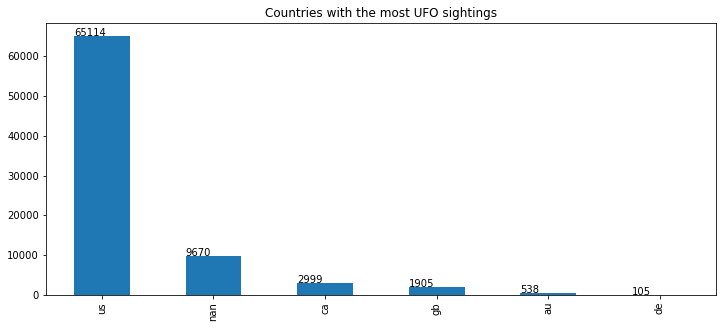

In [40]:
plt.figure(figsize=(12,5))
plt.title("Countries with the most UFO sightings")
ax = df.country.value_counts(dropna=False).plot(kind = "bar")
for p in ax.patches:
    ax.annotate( str(p.get_height()),  (p.get_x(), p.get_height()+20));

In [41]:
df.state.value_counts(dropna = False)

ca     9655
NaN    5797
wa     4268
fl     4200
tx     3677
       ... 
nf       25
nt       20
pe       17
yt       13
yk        7
Name: state, Length: 68, dtype: int64

# Shape

In [42]:
df['shape'].value_counts(dropna=False)

light        16565
triangle      7865
circle        7608
fireball      6208
other         5649
unknown       5584
sphere        5386
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
NaN           1932
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
round            2
crescent         2
pyramid          1
flare            1
hexagon          1
dome             1
changed          1
Name: shape, dtype: int64

In [43]:
df["shape"].isnull().sum()

1932

In [44]:
df[df['shape'].isnull()].sample(5)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
54875,2013-07-10 06:00:00,miami,fl,us,NaN,5,5 seconds,To whom it may Concern I work in Miami Florid...,7/22/2013,25.7738889,-80.193889
60752,1995-07-30 22:45:00,san fernando,ca,us,NaN,1800,30 min.,Second call from two men witnessing multiple c...,11/2/1999,34.2819444,-118.438056
34340,2004-03-31 23:00:00,inkerman/tracadie (canada),nb,NaN,NaN,1800,30 minutes,Flying UFO with tree different lights colors (...,4/9/2004,47.571042,-64.915619
55358,1996-07-01 12:00:00,yakima,wa,us,NaN,1200,20 min,Man and childern view silver/blue reflective o...,11/2/1999,46.6022222,-120.504722
63583,2010-07-07 15:00:00,sonora,tx,us,NaN,3600,1 hour,Vivid lights in daytime sky,8/30/2010,30.5666667,-100.643056


In [45]:
df['shape'].unique()

array(['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'other', 'cigar', 'rectangle', 'chevron',
       'triangle', 'formation', nan, 'delta', 'changing', 'egg',
       'diamond', 'flash', 'teardrop', 'cone', 'cross', 'pyramid',
       'round', 'crescent', 'flare', 'hexagon', 'dome', 'changed'],
      dtype=object)

In [46]:
# Sighting UFO by shape

In [47]:
df['shape'].value_counts(dropna = False)

light        16565
triangle      7865
circle        7608
fireball      6208
other         5649
unknown       5584
sphere        5386
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
NaN           1932
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
round            2
crescent         2
pyramid          1
flare            1
hexagon          1
dome             1
changed          1
Name: shape, dtype: int64

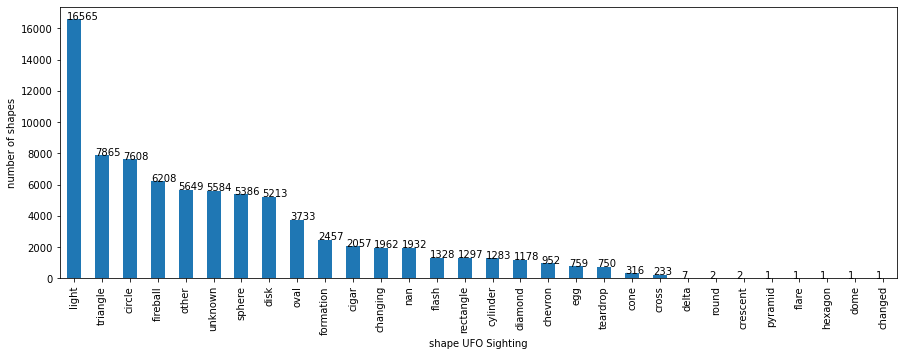

In [48]:
plt.figure(figsize=(15,5))
plt.xlabel('shape UFO Sighting')
plt.ylabel('number of shapes')
ax = df['shape'].value_counts(dropna = False).plot(kind = 'bar')
for p in ax.patches:
    ax.annotate( str(p.get_height()),  (p.get_x(), p.get_height()+20));


In [49]:
column_list

['datetime',
 'city',
 'state',
 'country',
 'shape',
 'duration (seconds)',
 'duration (hours/min)',
 'comments',
 'date posted',
 'latitude',
 'longitude ']

# 'duration (seconds)'

In [50]:
df.rename(columns={'duration (seconds)': 'duration_seconds'},inplace=True)

In [51]:
df.duration_seconds

0        2700
1        7200
2          20
3          20
4         900
         ... 
80327     600
80328    1200
80329    1200
80330       5
80331    1020
Name: duration_seconds, Length: 80331, dtype: object

In [52]:
column_list

['datetime',
 'city',
 'state',
 'country',
 'shape',
 'duration (seconds)',
 'duration (hours/min)',
 'comments',
 'date posted',
 'latitude',
 'longitude ']

# 'duration (hours/min)'

In [53]:
df.rename(columns={'duration (hours/min)':'duration_hours'},inplace=True)

In [54]:
df[['duration_seconds','duration_hours']]

,duration_seconds,duration_hours
0,2700,45 minutes
1,7200,1-2 hrs
2,20,20 seconds
3,20,1/2 hour
4,900,15 minutes
...,...,...
80327,600,10 minutes
80328,1200,20 minutes
80329,1200,hour
80330,5,5 seconds


In [55]:
df.duration_hours.isnull().sum()

0

In [56]:
df.duration_seconds.isnull().sum()

0

In [57]:
df[["duration_hours","duration_seconds"]].sample(5)

,duration_hours,duration_seconds
34271,15 minutes,900
43177,30 minutes,1800
41204,< 1 minute,60
2503,2 minutes,120
62121,15 min,900


In [58]:
# duration_hours and duration_seconds get familiar values.
# Duration_seconds's values more effective to use for analysing
# so duration_hours column can drop

In [59]:
df.drop(columns='duration_hours', axis=1,inplace=True)

In [60]:
df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration_seconds',
       'comments', 'date posted', 'latitude', 'longitude '],
      dtype='object')

In [61]:
df.duration_seconds.dtype

dtype('O')

In [62]:
# df.duration_seconds.astype('float')

In [63]:
df.duration_seconds

0        2700
1        7200
2          20
3          20
4         900
         ... 
80327     600
80328    1200
80329    1200
80330       5
80331    1020
Name: duration_seconds, Length: 80331, dtype: object

In [64]:
df.duration_seconds.value_counts()

300       8635
120       7110
600       6312
60        5866
180       5065
          ... 
634          1
299          1
300.13       1
108000       1
181          1
Name: duration_seconds, Length: 537, dtype: int64

In [65]:
df.sort_values(by = 'duration_seconds',ascending=True)

,datetime,city,state,country,shape,duration_seconds,comments,date posted,latitude,longitude
4081,2008-10-23 04:45:00,remote,wy,NaN,flash,0.001,brilliant strobe light at 4am moving lights lo...,1/10/2009,-46.163992,169.875050
70587,2002-08-30 13:45:00,kerry (republic of ireland),NaN,NaN,sphere,0.01,The object seemed to move at lightining speed,9/13/2002,52.154461,-9.566863
42378,1987-05-15 23:00:00,island lake,il,us,light,0.01,4 red laser like lines,1/12/2012,42.2761111,-88.191944
70393,2002-08-29 23:45:00,toledo,or,us,triangle,0.01,The object I saw was very clear and moved at ...,9/6/2002,44.6216667,-123.937222
23754,1999-12-09 18:15:00,lyle,wa,us,fireball,0.01,Incredible...full moon sized bright orange fir...,12/16/1999,45.6961111,-121.285000
...,...,...,...,...,...,...,...,...,...,...
53302,2000-06-03 22:00:00,manzanita,or,us,light,9900,There were orange colored lights coming from t...,6/21/2000,45.7186111,-123.933889
9430,2000-11-15 20:00:00,kokomo (west of),in,us,flash,9900,glittering white lights accompany bright orang...,9/6/2002,40.4863889,-86.133611
21529,2006-12-31 23:15:00,marikina (philippines),NaN,NaN,circle,9900,Sighting over Quezon City Philippines during m...,2/1/2007,14.65073,121.102855
32032,2004-03-17 16:30:00,milton,de,us,other,994,Boat/schooner shaped Hull curved rotating colo...,4/27/2004,38.7775000,-75.310278


In [82]:
# df.duration_seconds.astype('float')

0        2700.0
1        7200.0
2          20.0
3          20.0
4         900.0
          ...  
80327     600.0
80328    1200.0
80329    1200.0
80330       5.0
80331    1020.0
Name: duration_seconds, Length: 80331, dtype: float64

In [67]:
df[df.duration_seconds == '2`'].duration_seconds 

27822    2`
Name: duration_seconds, dtype: object

In [68]:
df[df.duration_seconds == '2`']

,datetime,city,state,country,shape,duration_seconds,comments,date posted,latitude,longitude
27822,2000-02-02 19:33:00,bouse,az,us,NaN,2`,Driving through Plomosa Pass towards Bouse Loo...,2/16/2000,33.9325000,-114.005


In [69]:
df.loc[27822,'duration_seconds'] = 2

In [70]:
df.loc[27822,'duration_seconds']

2

In [71]:
 # df.duration_seconds.astype(float)

In [72]:
df.duration_seconds = df.duration_seconds.str.strip('`')

In [73]:
df.duration_seconds = df.duration_seconds.astype(float)

In [74]:
df.duration_seconds.nlargest(20)

559      97836000.0
53384    82800000.0
74660    66276000.0
38261    52623200.0
64390    52623200.0
69215    52623200.0
52709    25248000.0
6991     10526400.0
30596    10526400.0
71172    10526400.0
10853     9468000.0
54009     9468000.0
31486     7894800.0
693       6312000.0
21527     6312000.0
21583     6312000.0
29747     6312000.0
30590     6312000.0
49422     6312000.0
53006     6312000.0
Name: duration_seconds, dtype: float64

In [75]:
liste = df.duration_seconds.nlargest(20).index.to_list()
liste

[559,
 53384,
 74660,
 38261,
 64390,
 69215,
 52709,
 6991,
 30596,
 71172,
 10853,
 54009,
 31486,
 693,
 21527,
 21583,
 29747,
 30590,
 49422,
 53006]

In [84]:
df.loc[liste]

,datetime,city,state,country,shape,duration_seconds,comments,date posted,latitude,longitude
559,1983-10-01 17:00:00,birmingham (uk/england),NaN,gb,sphere,97836000.0,Firstly I was stunned and stared at the object...,4/12/2013,52.466667,-1.916667
53384,2010-06-03 23:30:00,ottawa (canada),on,ca,other,82800000.0,((HOAX??)) I was out in a field near mil base...,7/6/2010,45.416667,-75.700000
74660,1991-09-15 18:00:00,greenbrier,ar,us,light,66276000.0,Orange or amber balls or orbs of light multipl...,3/31/2008,35.2338889,-92.387500
38261,2021-09-14 00:00:00,dont know,NaN,NaN,NaN,52623200.0,Hi I&#8217;m writing to you because I wanted ...,7/25/2004,41.730561,-78.682099
64390,2012-08-10 21:00:00,finley,wa,us,light,52623200.0,There have been several flying objects in a pe...,8/19/2012,46.1541667,-119.032778
69215,2002-08-24 01:00:00,englewood,fl,us,light,52623200.0,bright stars moving erratically over the Gulf ...,8/28/2002,26.9616667,-82.352778
52709,1969-06-30 22:45:00,somerset (uk/england),NaN,gb,cone,25248000.0,First time it was a bright light and missing t...,8/5/2009,51.083333,-3.000000
6991,2013-10-07 20:00:00,oklahoma,ok,NaN,circle,10526400.0,Bright flying orb.,10/14/2013,35.46756,-97.516428
30596,1994-03-01 01:00:00,menifee,ca,us,NaN,10526400.0,Sun City / Menifee UFO sightings in 1994,2/22/2005,33.7283333,-117.145556
71172,2008-08-03 21:00:00,virginia beach,va,us,fireball,10526400.0,this object was very high up and emmited no so...,8/12/2008,36.8527778,-75.978333


In [90]:
df.comments[38261]

'Hi  I&#8217;m writing to you because I wanted to talk to someone professional about my experiences. Never have I heard anyone talk about wha'

In [92]:
df.drop(index=38261,axis=0,inplace=True)